In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
# Download data from the Github site (baseball player's salary data)
# Fitting with only numerical variables
url_data = 'https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/9463d8c784b5cc9a271375e901524d4f1cf7378d/Notebooks/Data/Hitters.csv'
data_csv = pd.read_csv(url_data)
data_csv.dropna(inplace=True) # mask out NaN data
data_csv.drop(columns=['Division', 'League','NewLeague'], inplace=True) # ignore the catagorical vars.

A data frame with 322 observations of major league players on the following 20 variables.
(https://rdrr.io/cran/ISLR/man/Hitters.html)

`AtBat`
Number of times at bat in 1986

`Hits`
Number of hits in 1986

`HmRun`
Number of home runs in 1986

`Runs`
Number of runs in 1986

`RBI`
Number of runs batted in in 1986

`Walks`
Number of walks in 1986

`Years`
Number of years in the major leagues

`CAtBat`
Number of times at bat during his career

`CHits`
Number of hits during his career

`CHmRun`
Number of home runs during his career

`CRuns`
Number of runs during his career

`CRBI`
Number of runs batted in during his career

`CWalks`
Number of walks during his career

`League`
A factor with levels A and N indicating player's league at the end of 1986

`Division`
A factor with levels E and W indicating player's division at the end of 1986

`PutOuts`
Number of put outs in 1986

`Assists`
Number of assists in 1986

`Errors`
Number of errors in 1986

`Salary`
1987 annual salary on opening day in thousands of dollars

`NewLeague`
A factor with levels A and N indicating player's league at the beginning of 1987


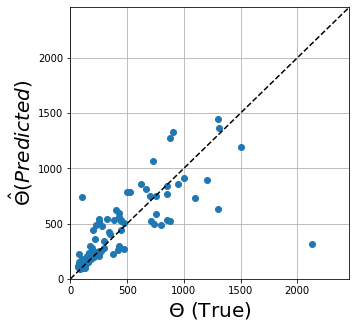

In [ ]:
# -- slide 8
# Creating a RF model
# load the data
X = data_csv.drop(columns=['Salary', 'Unnamed: 0'])
features = X.columns
y = data_csv['Salary']

# split the data
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 321)

# set the paratmers
n_estimators = 100
min_samples_leaf = 2
max_features = 'auto'
bootstrap = True
oob_score = True

# create the RF regressor object
regressor = RandomForestRegressor(n_estimators=n_estimators, min_samples_leaf=min_samples_leaf,
max_features=max_features, bootstrap=bootstrap, oob_score=oob_score, random_state = 321)

# fit the regressor with X and y data
regressor.fit(x_train, y_train)

# test our RF model
y_hat = regressor.predict(x_test)

# visualize our RF model's predictability
fig = plt.gcf()          # fig is the figure's unique handle
fig.set_size_inches(5,5) # define the fig's size in inch
plt.xlabel('$\Theta}$ (True)', size=20)
plt.ylabel('$\hat{\Theta} (Predicted) $', size=20)
plt.plot(y_test, y_hat, 'o')

ref_x = np.linspace(0, np.max(y), 10)
plt.plot(ref_x, ref_x, '--k')
plt.xlim([0, np.max(y)])
plt.ylim([0, np.max(y)])
plt.grid()



In [ ]:
# -- slide 10
# analyze OOB error
def RF_oobe_test(n_estimators, x_train, y_train, x_test, y_test):
    min_samples_leaf = 2
    max_features = 'auto'
    bootstrap = True
    oob_score = True

    # create the RF regressor object
    regressor = RandomForestRegressor(n_estimators=n_estimators, min_samples_leaf=min_samples_leaf,
    max_features=max_features, bootstrap=bootstrap, oob_score=oob_score, random_state = 321)

    # fit the regressor with X and y data
    regressor.fit(x_train, y_train)

    return regressor.oob_score_, regressor.score(x_train, y_train), regressor.score(x_test, y_test) # slide 10

n_estimators_list = np.arange(1, 200, 10)
oob_score   = np.zeros(len(n_estimators_list))
score_train = np.zeros(len(n_estimators_list))
score_test  = np.zeros(len(n_estimators_list))
for i, n in enumerate(n_estimators_list):
    oob_score[i], score_train[i], score_test[i] = RF_oobe_test(n, x_train, y_train, x_test, y_test)



/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


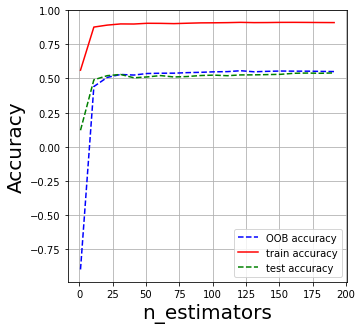

In [ ]:
# -- slide 10 (plot different accuracy scores)
fig = plt.gcf()          # fig is the figure's unique handle
fig.set_size_inches(5,5) # define the fig's size in inch
plt.ylabel('Accuracy', size=20)
plt.xlabel('n_estimators', size=20)

plt.plot(n_estimators_list, oob_score, '--b', label='OOB accuracy')
plt.plot(n_estimators_list, score_train, 'r', label='train accuracy')
plt.plot(n_estimators_list, score_test, '--g', label='test accuracy')
plt.legend()
plt.grid()

<BarContainer object of 16 artists>

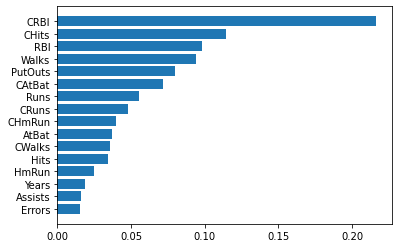

In [ ]:
# -- slide 12 (Variable Importance)
f_i = list(zip(features,regressor.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=12b73f9a-5dd8-43d6-99ee-0bde04bee819' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>